In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("tips.csv")
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


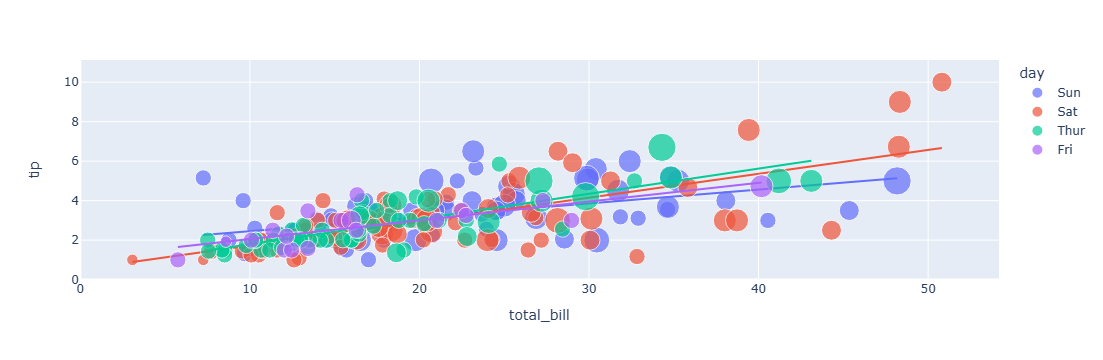

In [39]:
figure = px.scatter(data_frame = data, x="total_bill",
                    y="tip", size="size", color= "day", trendline="ols")
figure.show()

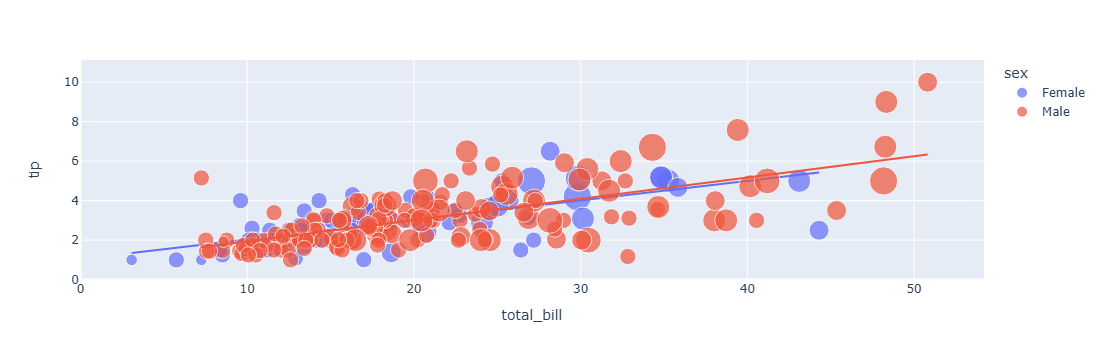

In [41]:
figure = px.scatter(data_frame = data, x="total_bill",
                    y="tip", size="size", color= "sex", trendline="ols")
figure.show()

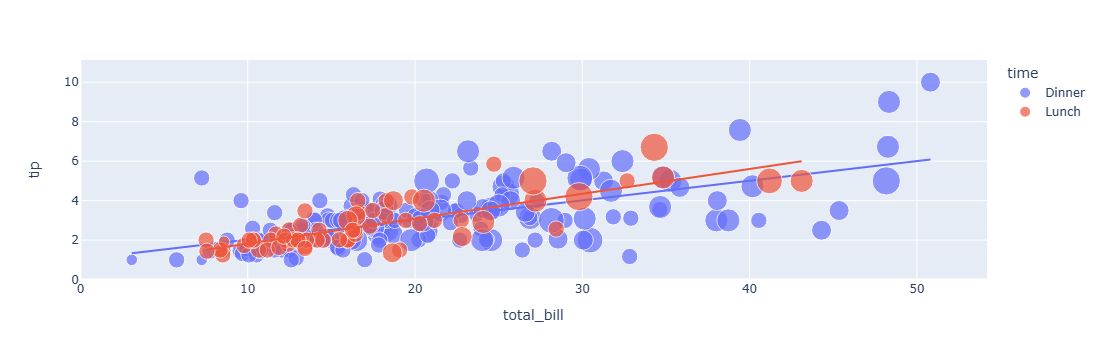

In [43]:
figure = px.scatter(data_frame = data, x="total_bill",
                    y="tip", size="size", color= "time", trendline="ols")
figure.show()

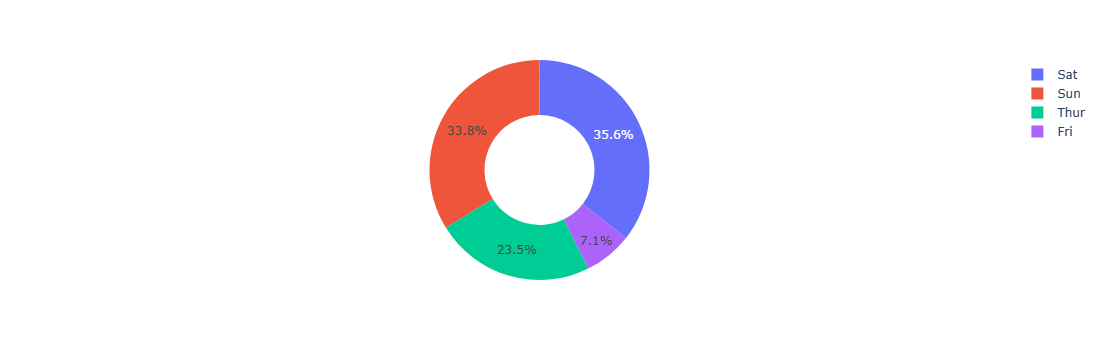

In [45]:
figure = px.pie(data, 
             values='tip', 
             names='day',hole = 0.5)
figure.show()

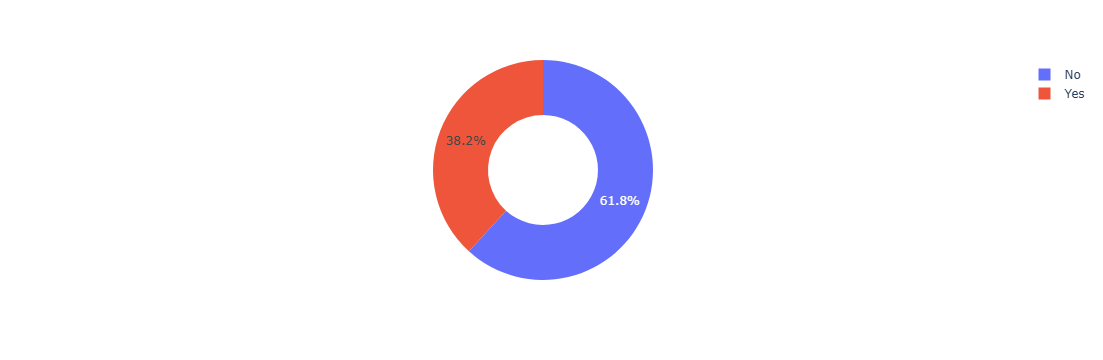

In [47]:
figure = px.pie(data, 
             values='tip', 
             names='smoker',hole = 0.5)
figure.show()

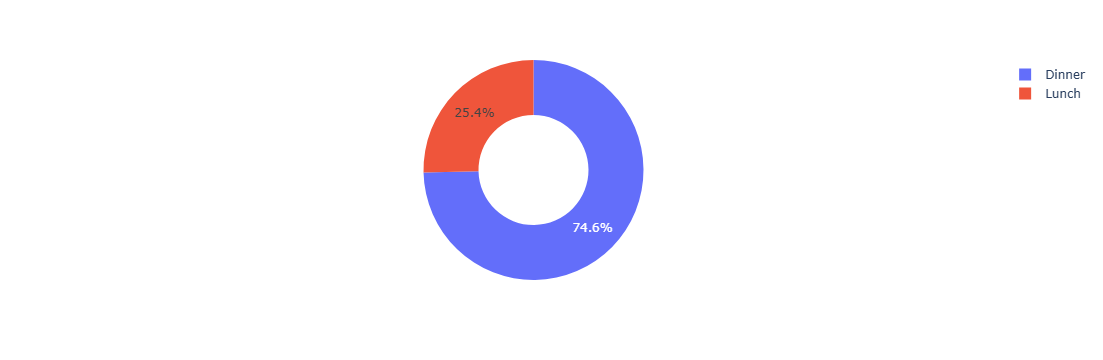

In [49]:
figure = px.pie(data, 
             values='tip', 
             names='time',hole = 0.5)
figure.show()

In [51]:
data["sex"] = data["sex"].map({"Female": 0, "Male": 1})
data["smoker"] = data["smoker"].map({"No": 0, "Yes": 1})
data["day"] = data["day"].map({"Thur": 0, "Fri": 1, "Sat": 2, "Sun": 3})
data["time"] = data["time"].map({"Lunch": 0, "Dinner": 1})
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3,1,2
1,10.34,1.66,1,0,3,1,3
2,21.01,3.50,1,0,3,1,3
3,23.68,3.31,1,0,3,1,2
4,24.59,3.61,0,0,3,1,4


In [53]:
x = np.array(data[["total_bill", "sex", "smoker", "day", 
                   "time", "size"]])
y = np.array(data["tip"])

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

In [55]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [57]:
# features = [[total_bill, "sex", "smoker", "day", "time", "size"]]
features = np.array([[24.50, 1, 0, 0, 1, 4]])
model.predict(features)

array([3.73742609])